In [1]:
import os, glob, random
import albumentations as A

from utils.data import get_datasize
from albumentations.pytorch import transforms

In [2]:
import torch

In [3]:
torch.logical_and(torch.tensor([0, 0, 1, 1]), torch.tensor([0, 1, 0, 1]))

tensor([False, False, False,  True])

In [4]:
torch.logical_or(torch.tensor([0, 0, 1, 1]), torch.tensor([0, 1, 0, 1]))

tensor([False,  True,  True,  True])

In [5]:
root_dir = './segmentation/dataset/refined/'

In [6]:
for i in ['crushed', 'scratched', 'separated']:
    for j in ['train', 'val', 'test']:
        print(f'{i.capitalize()}_{j} | ', end='')
        get_datasize(root_dir=root_dir, damage=i, type=j)
    print('')

Crushed_train | Image file size : 1000 | Mask file size : 1000
Crushed_val | Image file size : 100 | Mask file size : 100
Crushed_test | Image file size : 100 | Mask file size : 100

Scratched_train | Image file size : 1400 | Mask file size : 1400
Scratched_val | Image file size : 200 | Mask file size : 200
Scratched_test | Image file size : 200 | Mask file size : 200

Separated_train | Image file size : 1100 | Mask file size : 1100
Separated_val | Image file size : 100 | Mask file size : 100
Separated_test | Image file size : 63 | Mask file size : 63



In [7]:
from utils.visual import *

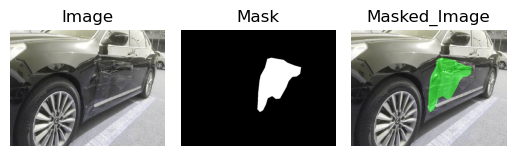

In [8]:
img_path = glob.glob('./segmentation/dataset/refined/crushed/train/image/*')
random_img = random.sample(img_path, k=1)
name = random_img[0].split('/')[-1].split('.')[0]
mask_path = glob.glob(f'./segmentation/dataset/refined/crushed/train/label/{name}*')[0]
visual_img(img_path=random_img[0], mask_path=mask_path)

In [9]:
from segmentation.data_loader import *

In [10]:
transform_train = A.Compose([
    A.HorizontalFlip(),
    A.Rotate((-30, 30), p=0.5, border_mode=cv2.BORDER_REFLECT,),
    A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3),
    A.Resize(256, 256),
    A.Normalize(mean = 0.5, std=0.5),
    transforms.ToTensorV2(transpose_mask=True)
])

train_dataset = Custom_dataset('./segmentation/dataset/refined/scratched/train/', transform=transform_train)

In [11]:
transform_val = A.Compose([
    A.Resize(256, 256),
    A.Normalize(mean = 0.5, std=0.5),
    transforms.ToTensorV2(transpose_mask=True)
])

In [12]:
val_dataset = Custom_dataset(data_dir='./segmentation/dataset/refined/scratched/val/', transform=transform_val)

In [13]:
train_dir = './segmentation/dataset/refined/scratched/train/'
train_dataloader = get_dataloader(data_dir_=train_dir, transform_=transform_train, batch_size=4)

In [14]:
val_dir = './segmentation/dataset/refined/scratched/val/'
val_dataloader = get_dataloader(data_dir_=val_dir, transform_=transform_train, batch_size=4)

In [15]:
len(train_dataloader), len(val_dataloader)

(350, 50)

In [16]:
train_dataset[0]['label'].shape

torch.Size([1, 256, 256])

In [22]:
pred, val = make_mask(train_dataset[1]['label'], train_dataset[1]['label'])

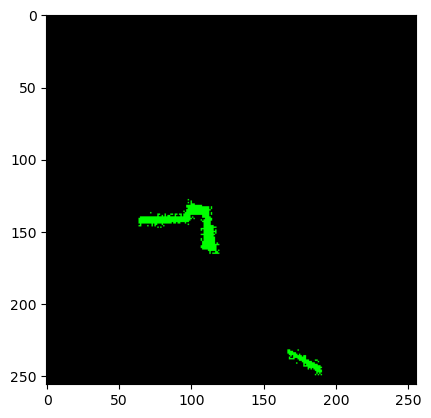

In [23]:
plt.imshow(pred)

In [2]:
import torch

In [3]:
sample = torch.randn(size=(4,1,224,224))

In [8]:
(torch.sigmoid(sample) > 0.5).float()

tensor([[[[1., 1., 1.,  ..., 1., 0., 1.],
          [1., 0., 0.,  ..., 1., 1., 0.],
          [1., 0., 1.,  ..., 0., 1., 0.],
          ...,
          [1., 1., 0.,  ..., 0., 1., 0.],
          [1., 1., 1.,  ..., 0., 0., 0.],
          [1., 0., 0.,  ..., 1., 0., 1.]]],


        [[[0., 1., 0.,  ..., 0., 1., 0.],
          [1., 1., 1.,  ..., 0., 1., 0.],
          [1., 1., 0.,  ..., 0., 0., 1.],
          ...,
          [0., 1., 1.,  ..., 0., 1., 1.],
          [0., 1., 0.,  ..., 1., 0., 1.],
          [0., 0., 0.,  ..., 1., 1., 1.]]],


        [[[0., 0., 1.,  ..., 0., 1., 0.],
          [1., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 1., 0.],
          ...,
          [1., 0., 1.,  ..., 1., 1., 0.],
          [0., 0., 1.,  ..., 0., 1., 0.],
          [0., 0., 1.,  ..., 0., 0., 1.]]],


        [[[1., 1., 1.,  ..., 0., 0., 0.],
          [0., 1., 1.,  ..., 1., 1., 0.],
          [0., 1., 0.,  ..., 1., 0., 0.],
          ...,
          [1., 0., 1.,  ..., 1., 1., 0.],
    

In [19]:
a = torch.tensor([1,0,0,1])
b = torch.tensor([0,1,0,0])

In [32]:
import numpy as np

In [33]:
np.nansum([1, float('nan'), 2])

3.0

In [35]:
np.nanmean([1, float('nan'), 2])

1.5

In [37]:
import glob

In [38]:
len(glob.glob('./segmentation/dataset/dent/valid/images/*'))

267

In [45]:
import cv2
import albumentations as A
from albumentations.pytorch import transforms

In [66]:
transform_train = A.Compose([
    A.HorizontalFlip(),
    A.RandomBrightnessContrast(),
    A.Rotate((-10, 10), p=0.5, border_mode=cv2.BORDER_REFLECT,),
    A.Resize(224, 224),
    A.Normalize(),
    transforms.ToTensorV2(transpose_mask=True)
])

In [76]:
'Normalize' in [i.__class__.__name__ for i in transform_train]

True